## Project Name: Health Insurance Cross Sell Prediction

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Data</p> 

## Problem Statement

<div style="background-color:#d5eae9; padding:20px; font-size:15px">
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<div style="background-color:#d5eae9; padding:20px; font-size:15px">

**This notebook includes the following:**

- Preprocessing
- Data cleaning
- Exploratory data analysis (EDA)
- Preparing the data to train a model
- Training and making predictions using various classification models
- Model evaluation

<div style="background-color:#d5eae9; padding:20px; font-size:15px">

|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | id | Unique ID for the customer |                
| **2** | Gender | 	Gender of the customer |                        
| **3** | Age | Age of the customer |
| **4** | Driving_License | 	0 : Customer does not have DL, 1 : Customer already has DL |
| **5** | Region_Code | Unique code for the region of the customer |                     
| **6** | Previously_Insured | 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| **7** | Vehicle_Age | Age of the Vehicle |              
| **8** | Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past  |                      
| **9** | Annual_Premium |  The amount customer needs to pay as premium in the year |
| **10** | Policy_Sales_Channel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| **11** | Vintage | Number of Days, Customer has been associated with the company |                      
| **12** | Response | 1 : Customer is interested, 0 : Customer is not interested |

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Import Libraries</p> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.shape

(381109, 12)

In [6]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

- We can see that there is no missing values in our dataset .Thus we do not need to impute any values and can proceed for further analysis

In [7]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


## UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

<AxesSubplot:xlabel='Gender', ylabel='count'>

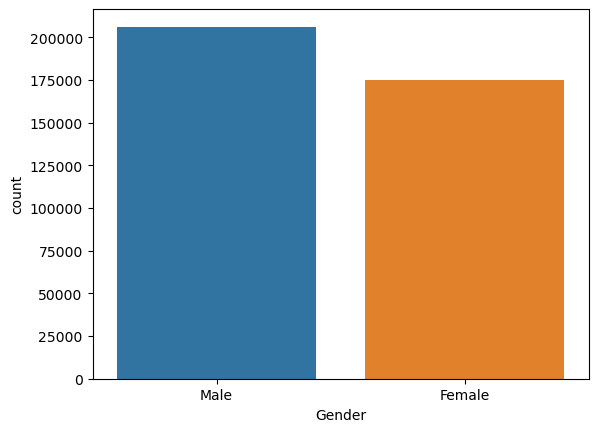

In [9]:
sns.countplot(data=data,x='Gender')

- From this graph we can clearly see that Male are having positive response towards insurance purchase while female are having negative response.Thus from this we can conclude that the most targeted customers are Male than Female.So, we need to focus on strengthening the Female customers buyers for buying the insurance.



<AxesSubplot:xlabel='Driving_License', ylabel='count'>

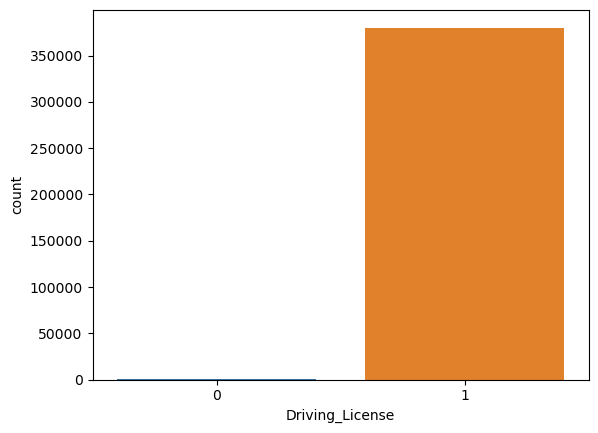

In [10]:
sns.countplot(data = data, x = 'Driving_License')

- ALMOST ALL PEOPLE HAVE DRIVING LICENSE.. THAT'S GOOD

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

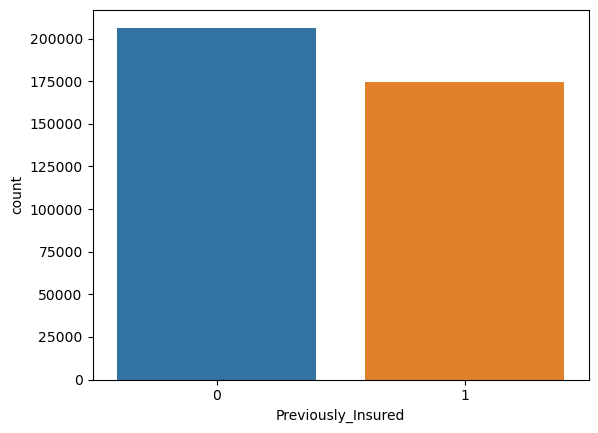

In [11]:
sns.countplot(data = data, x = 'Previously_Insured')

- THERE ARE MORE NUMBER OF PEOPLE WHO HAVE NO PREVIOUS INSURANCE POLICY

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

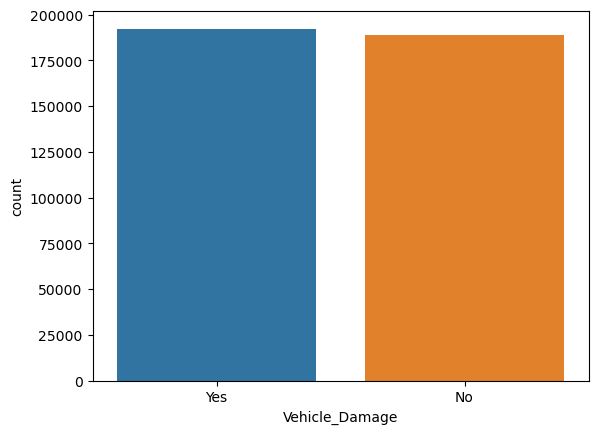

In [12]:
sns.countplot(data = data, x = 'Vehicle_Damage')

Text(0, 0.5, 'Resonse')

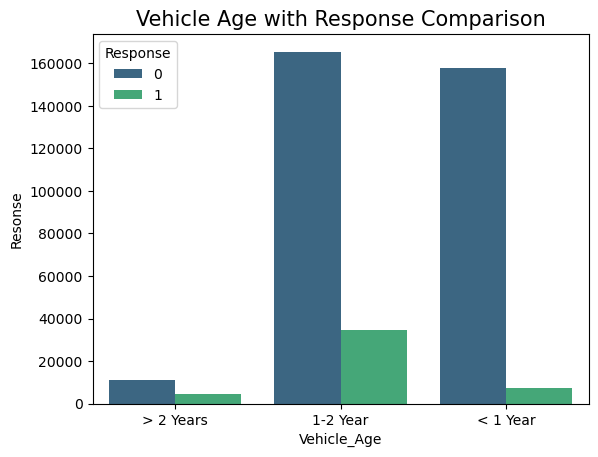

In [13]:
sns.countplot(data = data, x = 'Vehicle_Age',hue=data['Response'],palette='viridis')
plt.title('Vehicle Age with Response Comparison',fontsize=15)
plt.ylabel('Resonse')

- We can see that buyers whose vehicle are between 1 to 2 years are more entrusted to buy insurance rather whose vehicle are less than 1 year or more than 2 years.



<AxesSubplot:xlabel='Response', ylabel='count'>

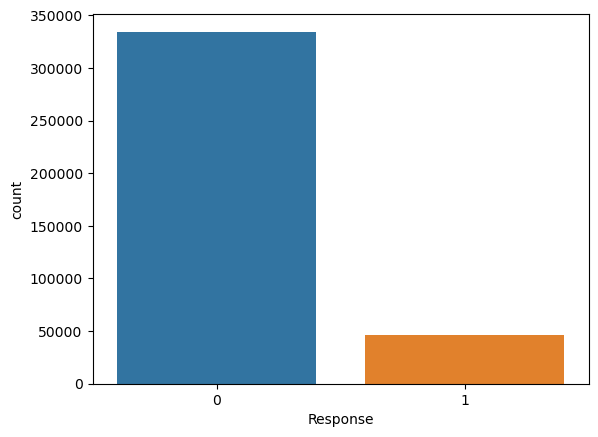

In [14]:
sns.countplot(data=data,x='Response')

- HERE WE GO... THIS DATASET IS HIGHLY IMBALANCED. WE WILL NEED TO TREAT IT BEFORE APPLYING A MACHINE LEARNING ALGORITHM BECAUSE TJIS IMBALANCE WILL LEAD TO POOR PERFORMANCE OF MODELS

## UNIVARIATE ANALYSIS OF CONTINUOUS VARIABLES

<AxesSubplot:ylabel='Density'>

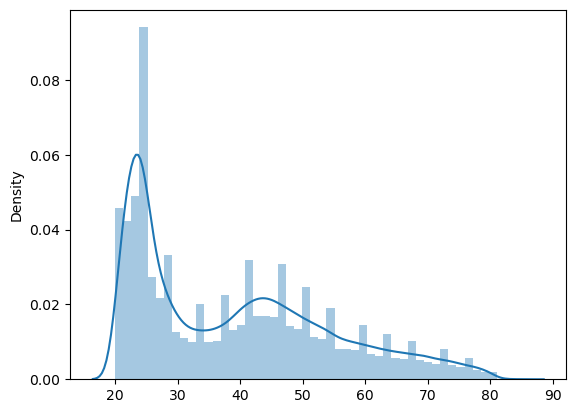

In [15]:
sns.distplot(x=data['Age'])

Text(0.5, 1.0, 'Age Vs People Buying And Not Buying Insurance')

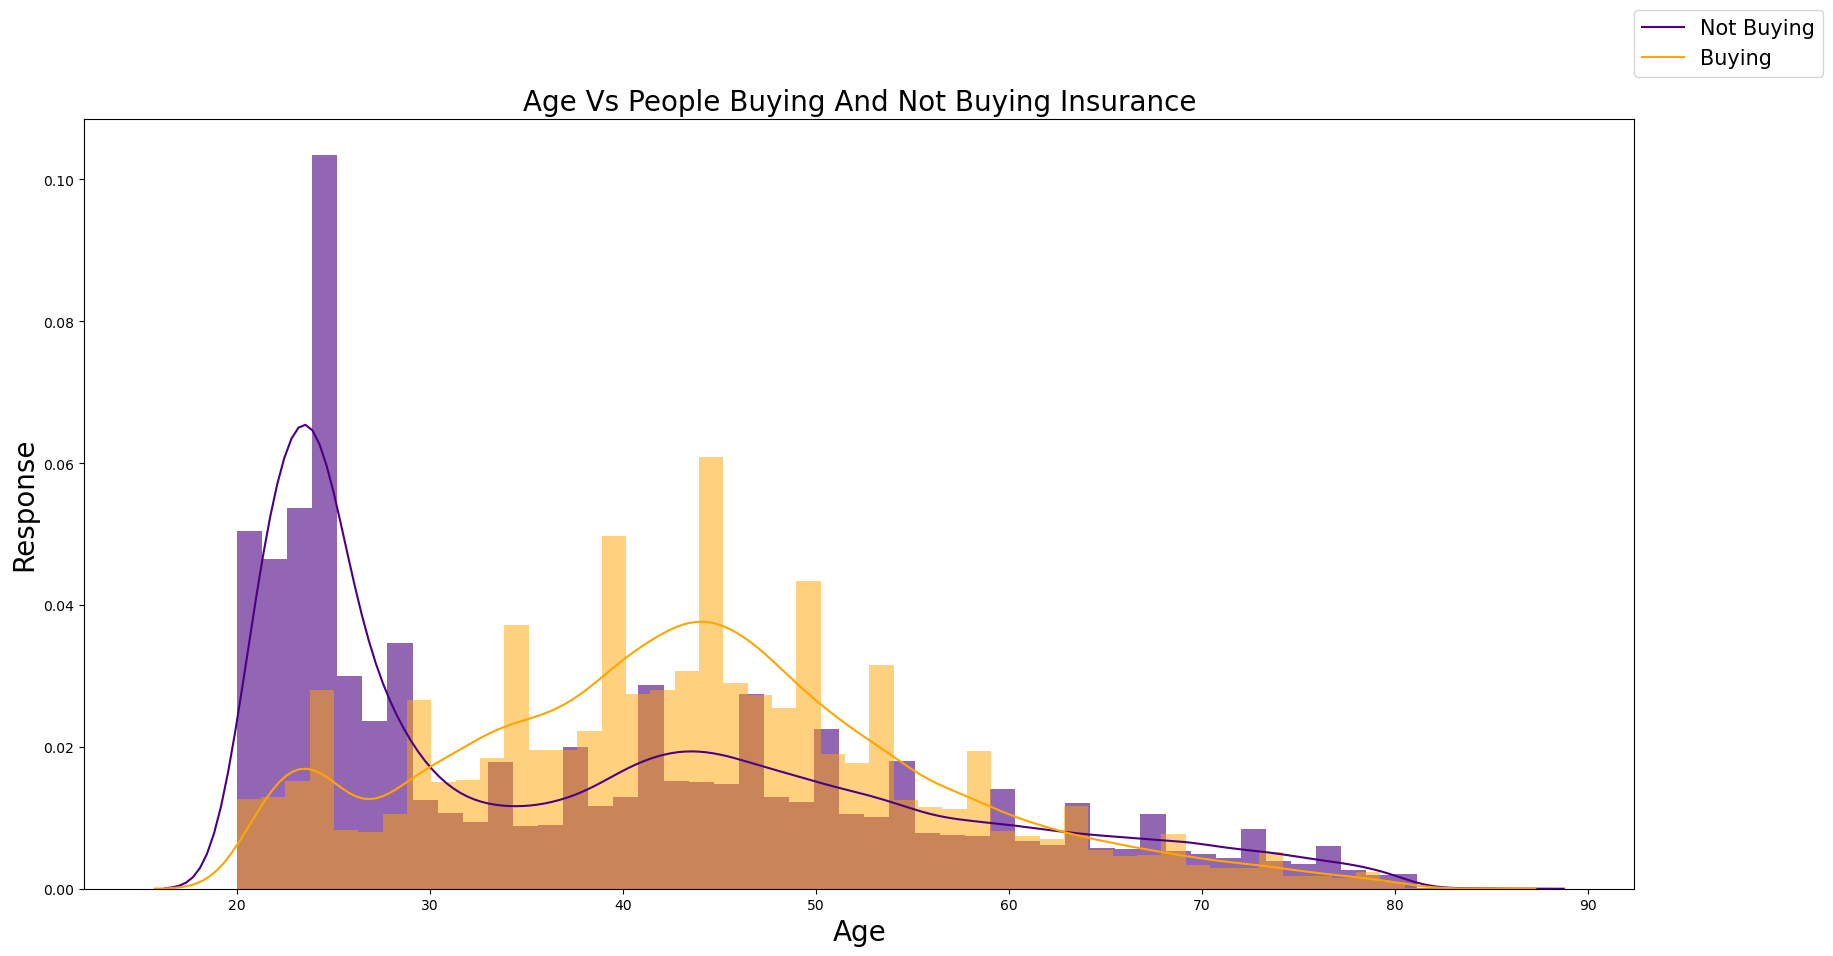

In [16]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['Response']==0]['Age'],color='indigo',hist_kws={'alpha':0.6})
sns.distplot(data[data['Response']==1]['Age'],color='orange',hist_kws={'alpha':0.5})
fig.legend(labels=['Not Buying','Buying'],fontsize=15)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Age Vs People Buying And Not Buying Insurance',fontsize=20)

Text(0.5, 1.0, 'Annual Premium Vs Not Buying Insurance ')

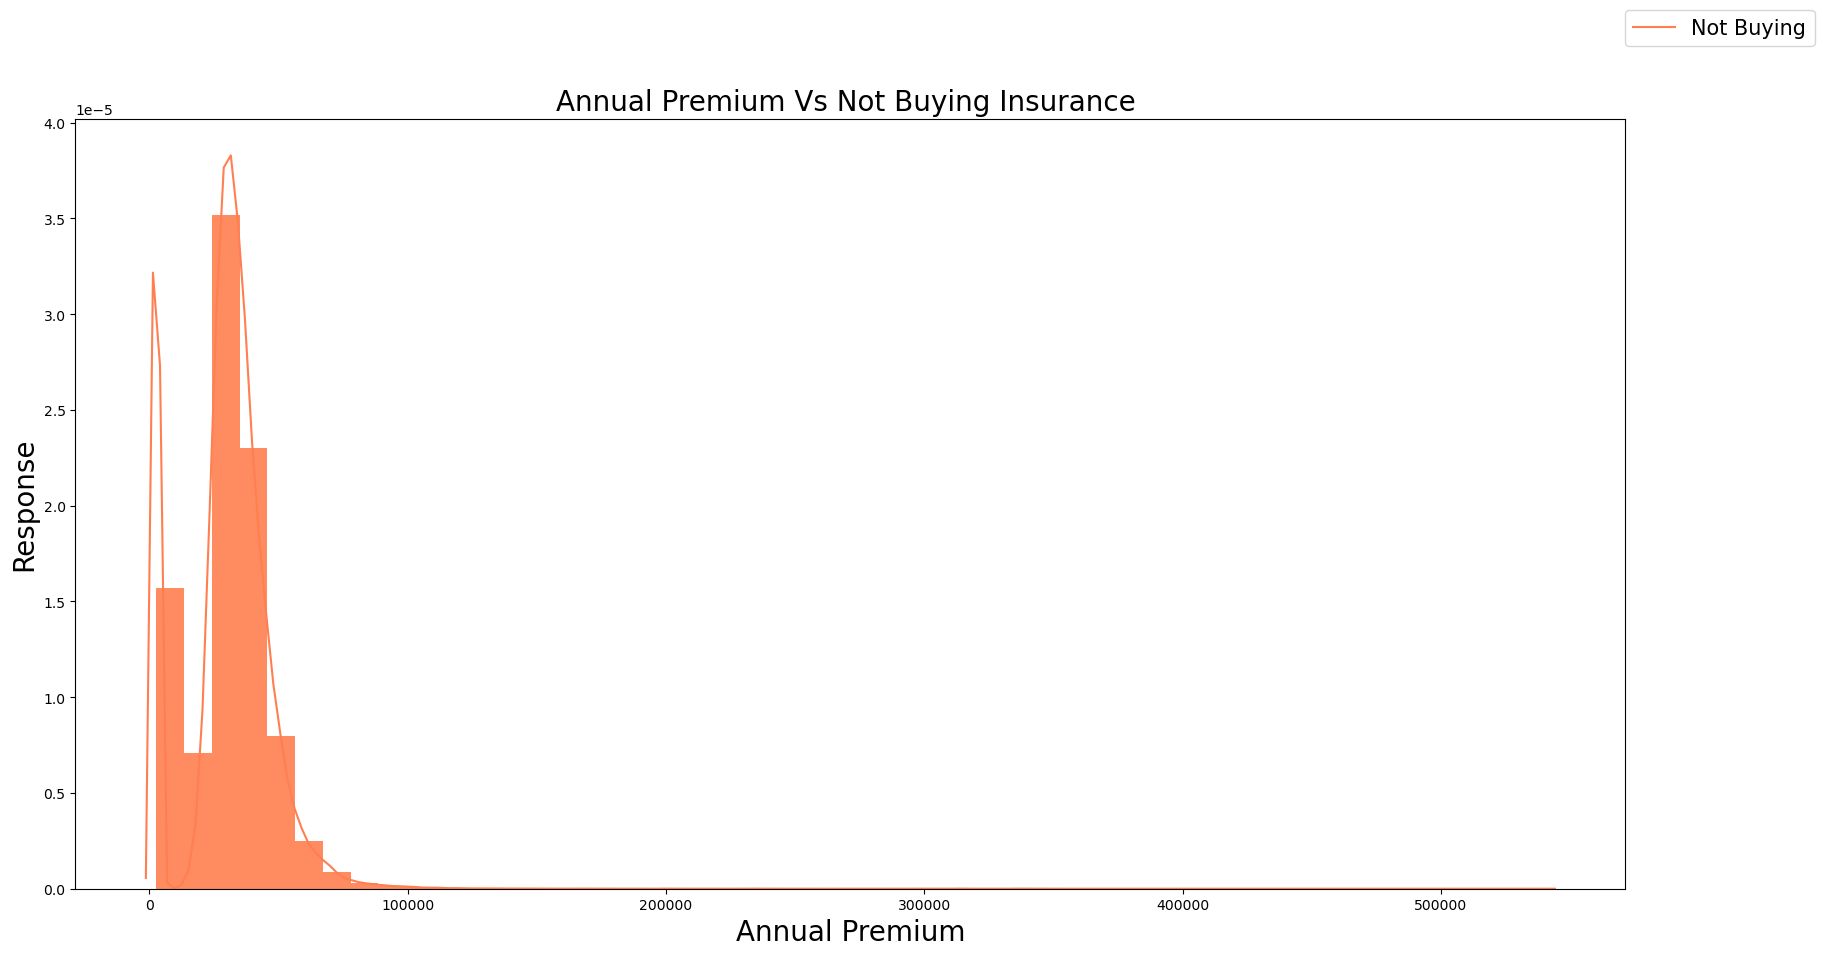

In [17]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['Response']==0]['Annual_Premium'],color='coral',hist_kws={'alpha':0.9})
fig.legend(labels=['Not Buying'],fontsize=15)
plt.xlabel('Annual Premium',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual Premium Vs Not Buying Insurance ',fontsize=20)

Text(0.5, 1.0, 'Annual Premium Vs People Buying ')

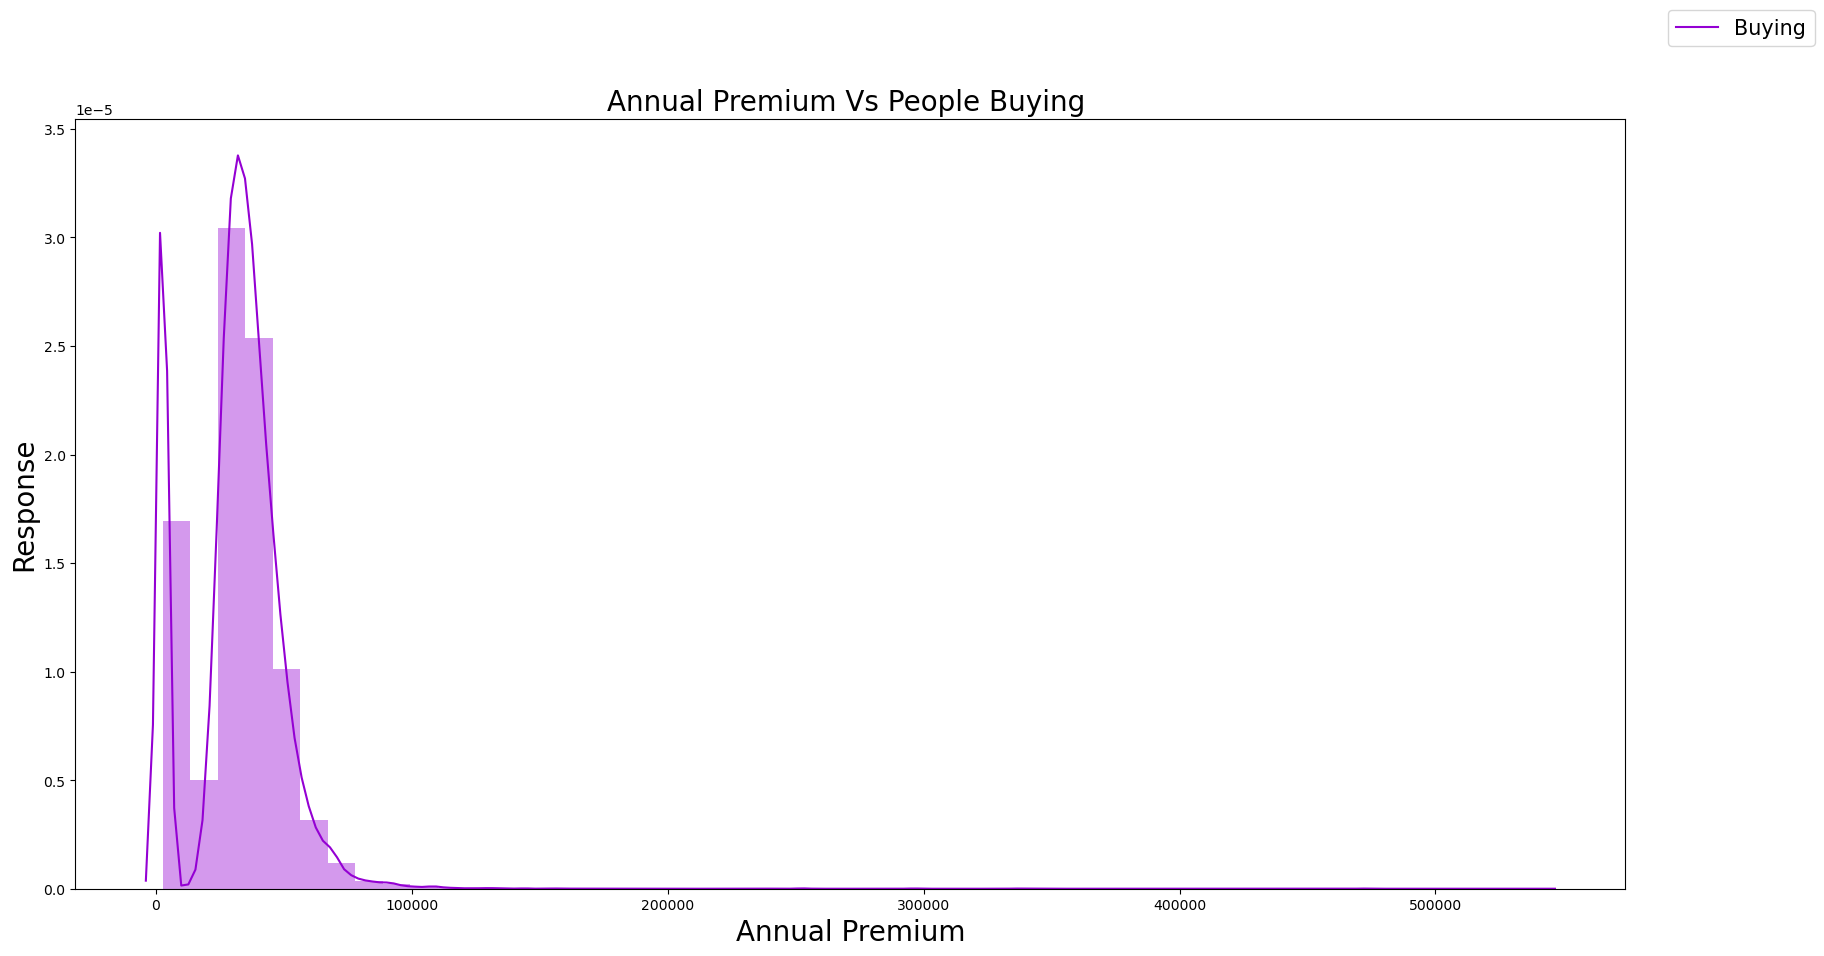

In [18]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['Response']==1]['Annual_Premium'],color='darkviolet',hist_kws={'alpha':0.4})
fig.legend(labels=['Buying'],fontsize=15)
plt.xlabel('Annual Premium',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual Premium Vs People Buying ',fontsize=20)

- From this we can understand the different Ages of People are buing the insurance :-

- Thus, it clearly shows that the trend of positive resoponse for buying the insurance increases between 21 to 25 and then again it get decreases from the Age 26 there is a little dip that shows that people in that age group are not interested in buying the insurance.
- From Age 30 till 46 it shows people trust for need of buying insurance increases and this shows that people from this age group are becoming more cautious for their future.
- From Age 47 we can see that the trend is decreasing, it may happen that people already bought long-term insurance thus the people are not investing in more insurances or because people dont want to invest in their Old Age.

## MULTIVARIATE ANALYSIS

In [19]:
bin=np.linspace(min(data['Age']),max(data['Age']),5)
groups=['Young_Age','Medium_Age','Old_Age','Senior_Citizen']
data['Age-binned']=pd.cut(data['Age'],bins=bin,labels=groups)

Text(0, 0.5, 'Response')

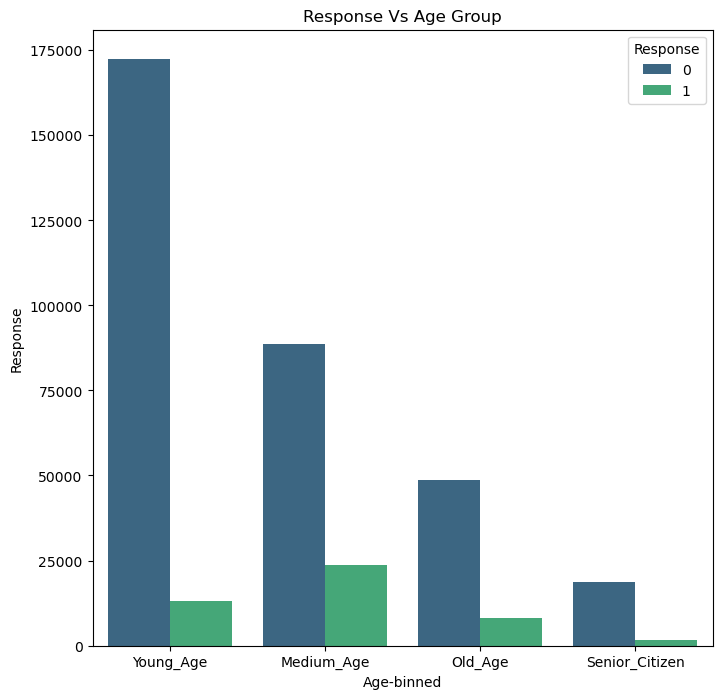

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(data = data, x = 'Age-binned',hue=data['Response'],palette='viridis')
plt.title('Response Vs Age Group')
plt.ylabel('Response')

- From this we can understand that people in Middle Age group are having more positive response and less negative response but the Young Age group are have more negative response than positive response and also the negative response among this group is more than any Age category group thus we need to increase the alertness or better the product offering for this category of Age group so that we get more positive response from this Age group and also from other Age group.

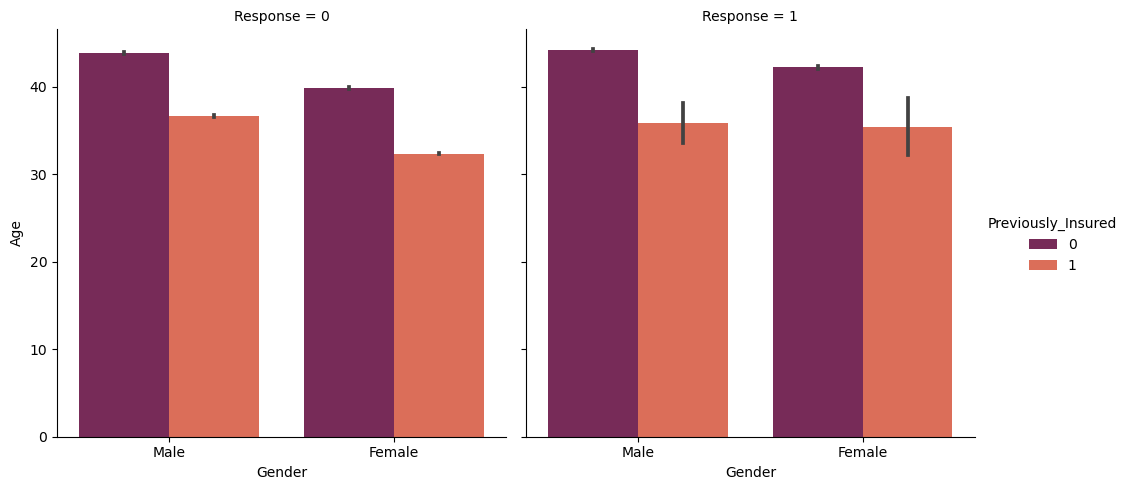

In [21]:
sns.catplot(x='Gender',y='Age',hue='Previously_Insured',col='Response',data=data,kind='bar',palette='rocket')

- We can see that positive response for Male are above 40 for those who were not previously insured against those who were previously insured and same for Female also that Age little over 40 have more positive response for not previously insured against those who were already previously insured

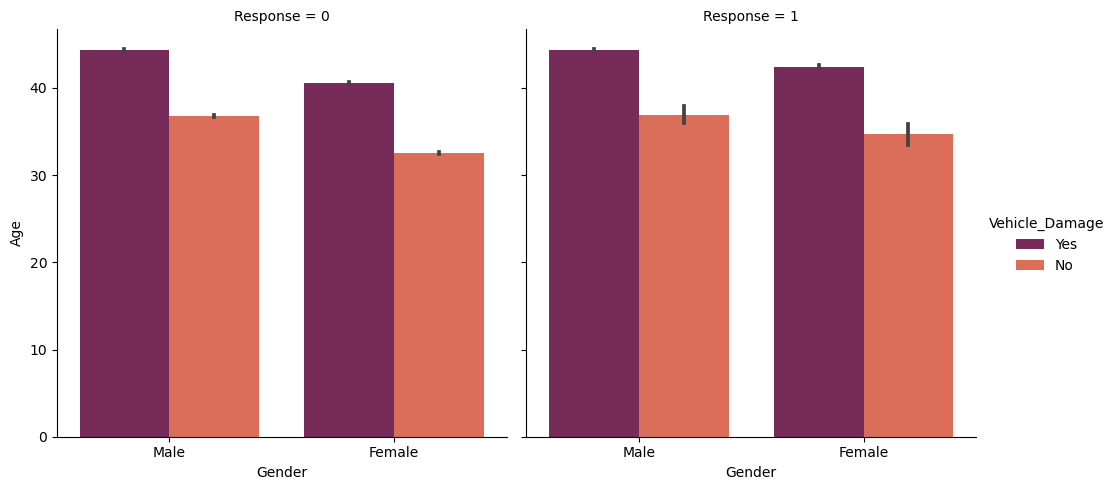

In [22]:
sns.catplot(x='Gender',y='Age',hue='Vehicle_Damage',col='Response',data=data,kind='bar',palette='rocket')

<AxesSubplot:>

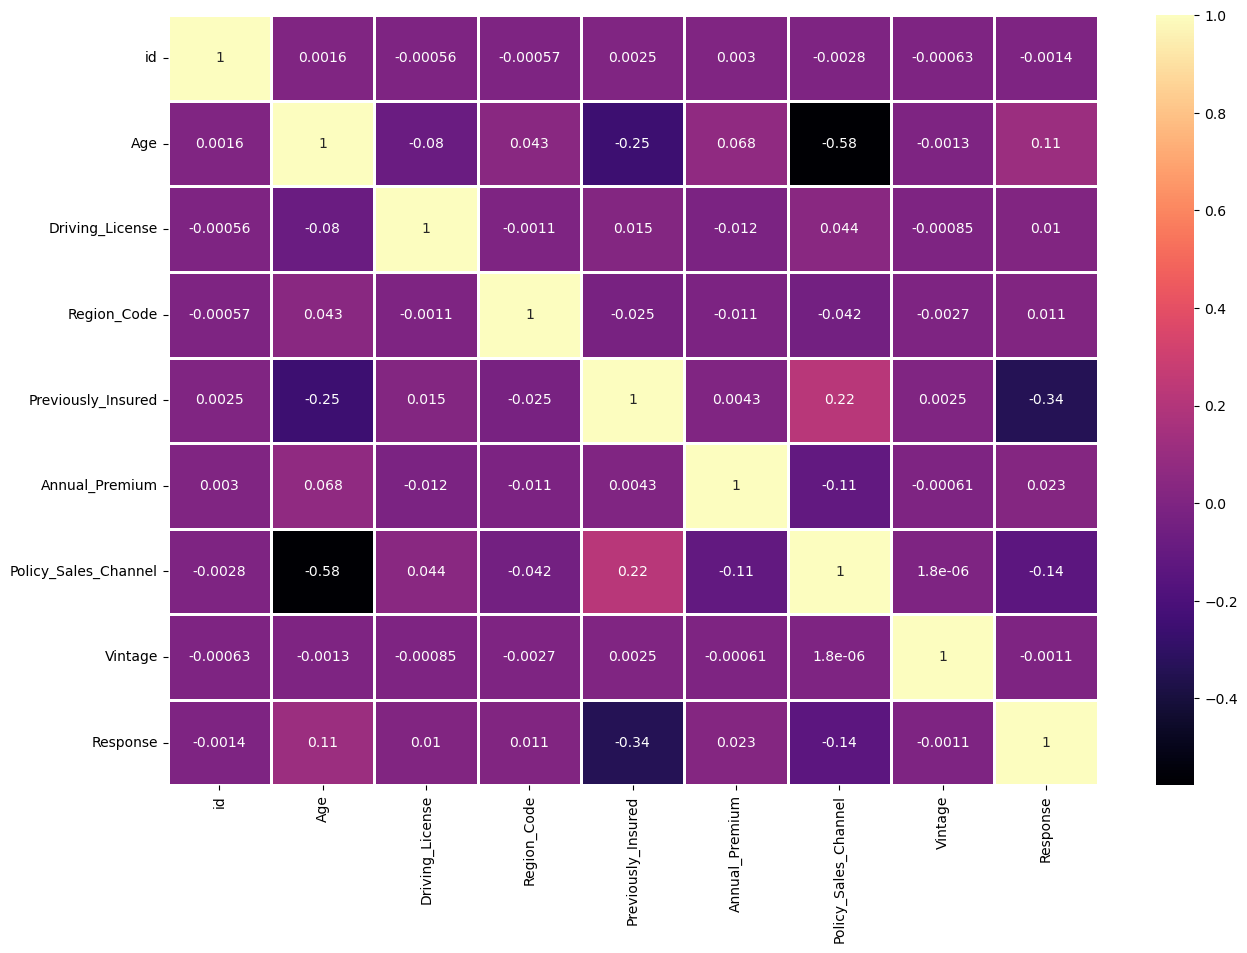

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linecolor='white',cmap='magma',linewidths=2)

- From the overall analysis :-

1. We can understand that some of the product offering of the insurance company is good proposition for the buyers and thus getting positive response among few categories.

2. Overall there many negative response than positive response from the customers thus we can assume that most of the product offering from the insurance company are degraded or the customer after sales response is not good or the product offering are not covering today's world customer needs or there is lack of marketing strategy from the insurance company.

3. Thus, We can conclude that the insurance company overall need to improve in terms of all offerings and also increasing the marketability of the product so that those negative responses can be converted more positive responses.

## OUTLIER TREATMENT

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

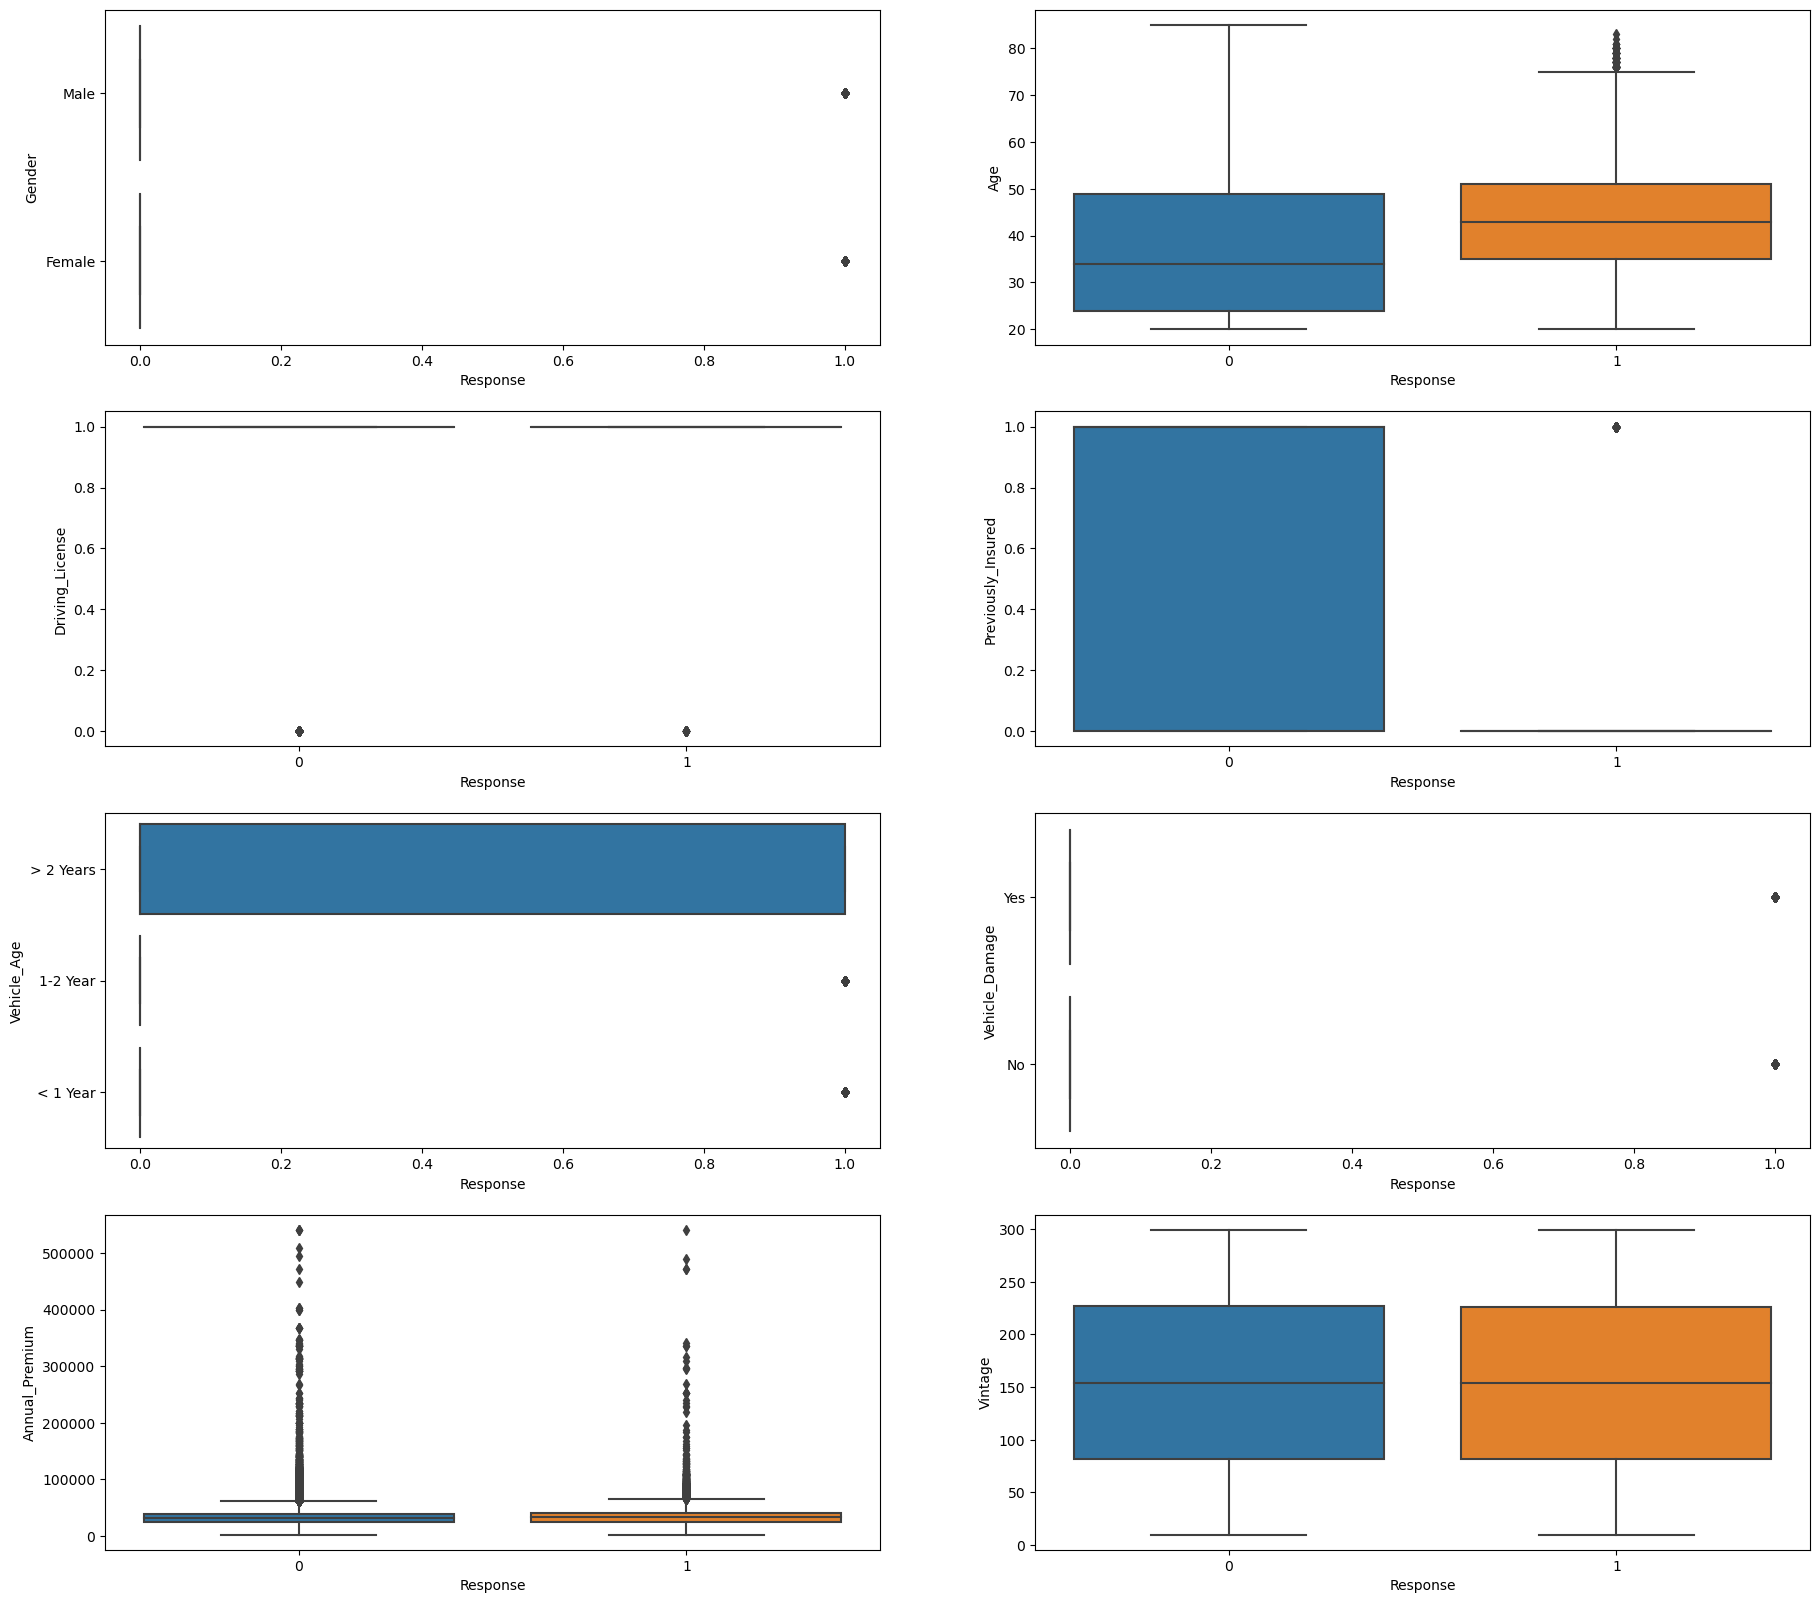

In [24]:
fig, axes = plt.subplots(4,2, figsize=(22,20))

sns.boxplot(ax=axes[0, 0], data=data, x='Response', y='Gender')
sns.boxplot(ax=axes[0, 1], data=data, x='Response', y='Age')
sns.boxplot(ax=axes[1, 0], data=data, x='Response', y='Driving_License')
sns.boxplot(ax=axes[1, 1], data=data, x='Response', y='Previously_Insured')
sns.boxplot(ax=axes[2, 0], data=data, x='Response', y='Vehicle_Age')
sns.boxplot(ax=axes[2, 1], data=data, x='Response', y='Vehicle_Damage')
sns.boxplot(ax=axes[3, 0], data=data, x='Response', y='Annual_Premium')
sns.boxplot(ax=axes[3, 1], data=data, x='Response', y='Vintage')

In [25]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [26]:
lowerbound,upperbound = outlier_treatment(data.Annual_Premium)

In [27]:
data[(data.Annual_Premium < lowerbound) | (data.Annual_Premium > upperbound)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age-binned
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0,Young_Age
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0,Young_Age
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0,Old_Age
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0,Young_Age
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0,Young_Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0,Young_Age
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0,Young_Age
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0,Young_Age
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0,Medium_Age


In [28]:
data.drop(data[ (data.Annual_Premium > upperbound) | (data.Annual_Premium < lowerbound) ].index , inplace=True)

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

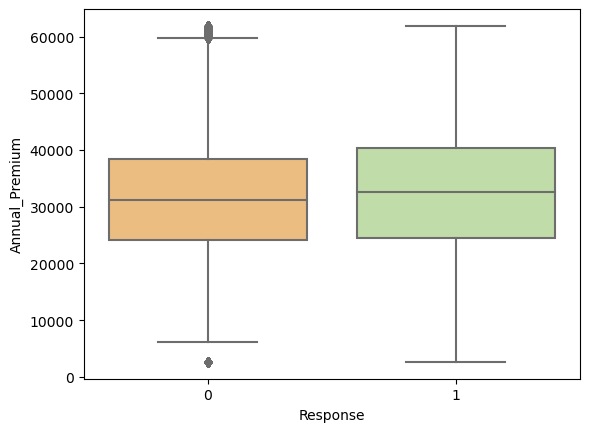

In [29]:
sns.boxplot( x='Response', y='Annual_Premium',data=data,palette='Spectral')

In [30]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age-binned'],
      dtype='object')

## LABEL ENCODING - CONVERTING CATEGORICAL TO NUMERIC VALUE

In [31]:
data['Gender'] = pd.get_dummies(data['Gender'],drop_first=True)

In [32]:
label = LabelEncoder()
data['Vehicle_Age']=label.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage']=label.fit_transform(data['Vehicle_Damage'])
data['Gender']=pd.get_dummies(data["Gender"],drop_first=True)

In [33]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age-binned'],
      dtype='object')

In [34]:
feature = [ 'Gender', 'Driving_License', 
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response']

## MODEL RESAMPLING - AS THE DATASET IS IMBALANCED

In [35]:
smote = SMOTE(random_state=1,n_jobs=-1)

In [36]:
x_sample,y_sample = smote.fit_resample(data.iloc[:,:-2],data['Response'])

In [37]:
x_frame = pd.DataFrame(x_sample,columns=['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
                              'Vehicle_Damage', 'Annual_Premium', 'Vintage'])

In [38]:
x_frame.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,44,1,0,2,1,40454.0,217
1,1,76,1,0,0,0,33536.0,183
2,1,47,1,0,2,1,38294.0,27
3,1,21,1,1,1,0,28619.0,203
4,0,29,1,1,1,0,27496.0,39


In [39]:
y_frame = pd.DataFrame(y_sample,columns=['Response'])

In [40]:
y_frame.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [41]:
y=y_frame.copy()

In [42]:
x=x_frame.copy()

[0.017067   0.15661783 0.00031351 0.17454826 0.07786706 0.18732577
 0.22111285 0.16514772]


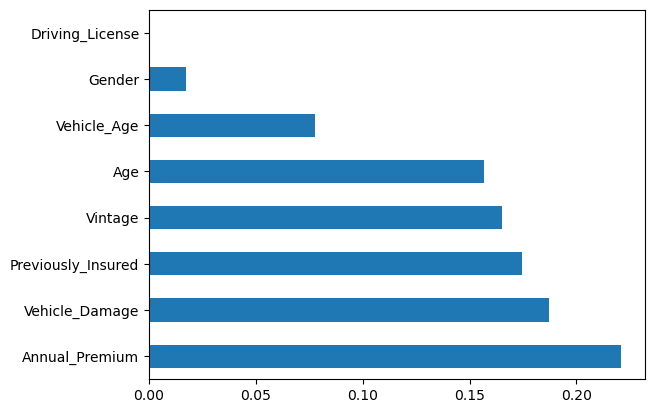

In [43]:
model = ExtraTreesClassifier()
model = model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [44]:
x=x_frame.drop(['Driving_License'],axis=1,inplace=True)
x=x_frame.copy()

In [45]:
x.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,44,0,2,1,40454.0,217
1,1,76,0,0,0,33536.0,183
2,1,47,0,2,1,38294.0,27
3,1,21,1,1,0,28619.0,203
4,0,29,1,1,0,27496.0,39


## MODEL SPLITTING

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

## MODEL SCALING

In [47]:
scaler = StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p>

## LOGISTIC REGRESSION

In [48]:
lr=LogisticRegression(random_state = 0,n_jobs = -1)
clf_l = lr.fit(x_train_s,y_train)
y_pred_log = clf_l.predict(x_test_s)
print(accuracy_score(y_test,y_pred_log)*100)
print(roc_auc_score(y_test,y_pred_log)*100)

78.30955927137234
78.27019220067695


In [49]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75     97363
           1       0.73      0.90      0.81     98018

    accuracy                           0.78    195381
   macro avg       0.80      0.78      0.78    195381
weighted avg       0.80      0.78      0.78    195381



Text(70.72222222222221, 0.5, 'Actual')

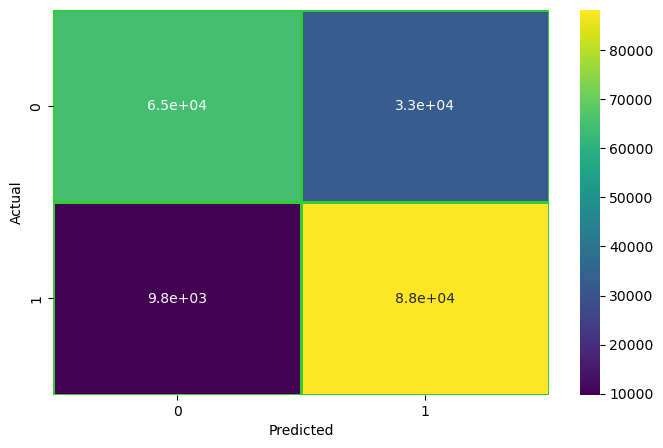

In [50]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_log),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

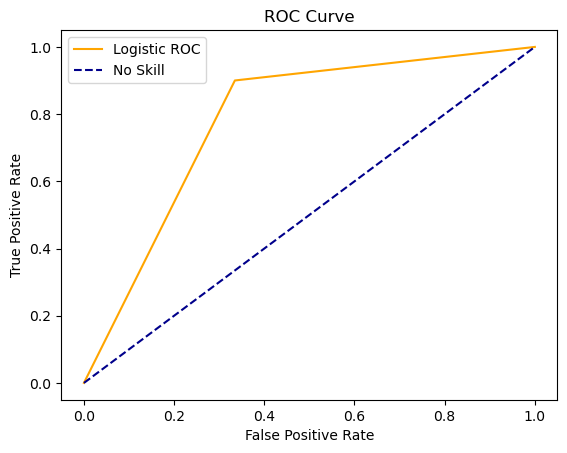

In [51]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_log)
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## RANDOM FOREST CLASSIFIER

In [52]:
rfc = RandomForestClassifier(random_state = 1,n_jobs = -1)
clf_r = rfc.fit(x_train_s,y_train)
y_pred_r = clf_r.predict(x_test_s)
print(accuracy_score(y_test,y_pred_r)*100)
print(roc_auc_score(y_test,y_pred_r)*100)

81.58674589647919
81.57362883125676


In [53]:
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     97363
           1       0.79      0.85      0.82     98018

    accuracy                           0.82    195381
   macro avg       0.82      0.82      0.82    195381
weighted avg       0.82      0.82      0.82    195381



Text(70.72222222222221, 0.5, 'Actual')

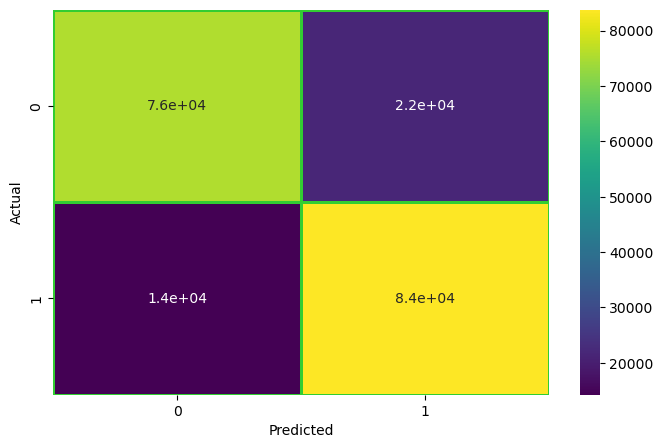

In [54]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_r),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

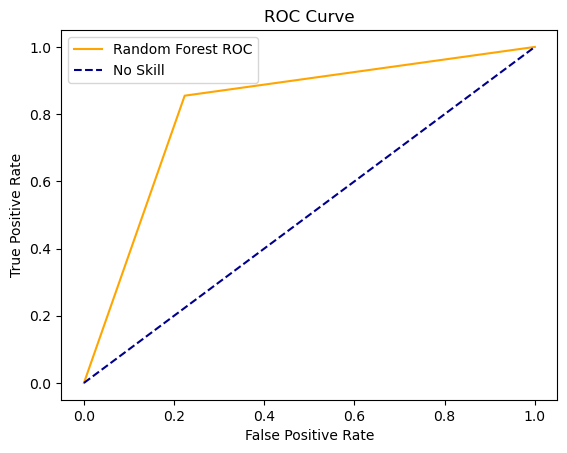

In [55]:
fpr1,tpr1,threshold=roc_curve(y_test,y_pred_r)
plt.plot(fpr1, tpr1, color='orange', label='Random Forest ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [56]:
knn=KNeighborsClassifier(n_jobs = -1,n_neighbors = 8)
clf_k = knn.fit(x_train_s,y_train)
y_pred_k = clf_k.predict(x_test_s)
print(accuracy_score(y_test,y_pred_k)*100)
print(roc_auc_score(y_test,y_pred_k)*100)

81.58265133252466
81.57467150227555


In [57]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     97363
           1       0.80      0.84      0.82     98018

    accuracy                           0.82    195381
   macro avg       0.82      0.82      0.82    195381
weighted avg       0.82      0.82      0.82    195381



Text(70.72222222222221, 0.5, 'Actual')

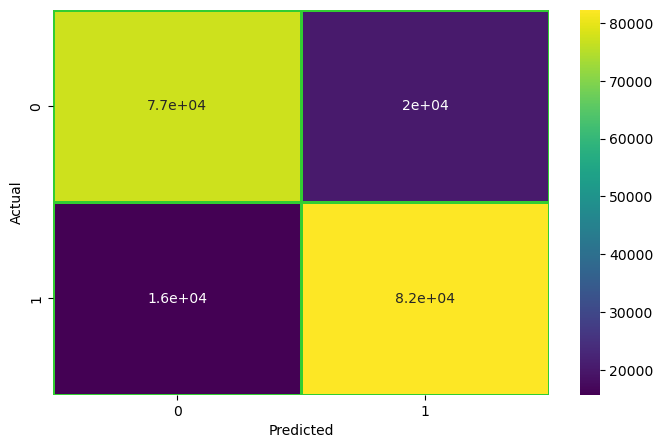

In [58]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_k),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

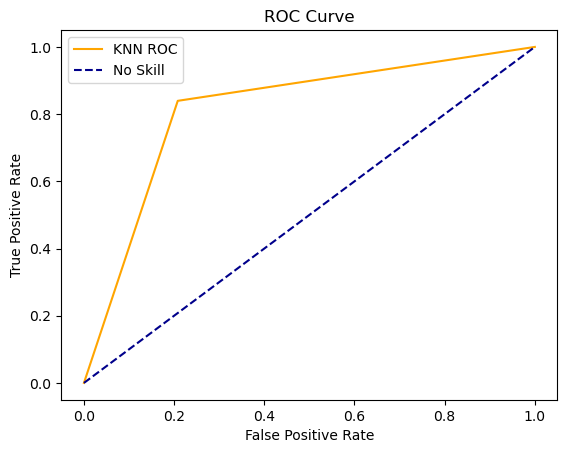

In [59]:
fpr3,tpr3,threshold=roc_curve(y_test,y_pred_k)
plt.plot(fpr3, tpr3, color='orange', label='KNN ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [60]:
gnb = GaussianNB()
clf_g = gnb.fit(x_train_s,y_train)
y_pred_g = clf_g.predict(x_test_s)
print(accuracy_score(y_test,y_pred_g)*100)
print(roc_auc_score(y_test,y_pred_g)*100)

78.14782399516842
78.08925807945116


In [61]:
print(classification_report(y_test,y_pred_g))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73     97363
           1       0.71      0.96      0.81     98018

    accuracy                           0.78    195381
   macro avg       0.82      0.78      0.77    195381
weighted avg       0.82      0.78      0.77    195381



Text(70.72222222222221, 0.5, 'Actual')

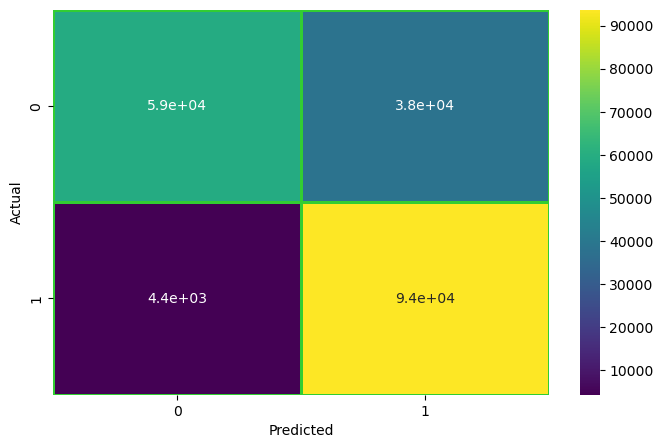

In [62]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_g),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

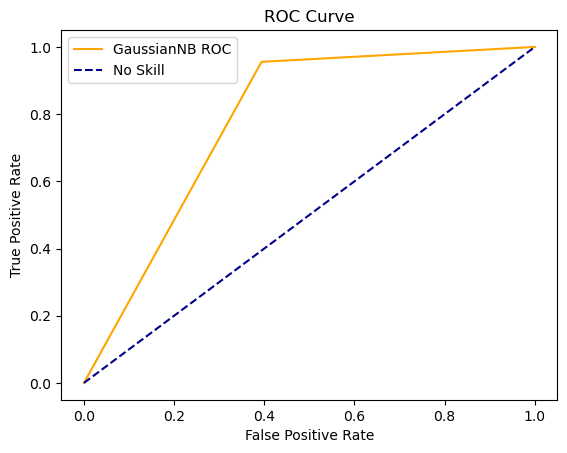

In [64]:
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_g)
plt.plot(fpr4, tpr4, color='orange', label='GaussianNB ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

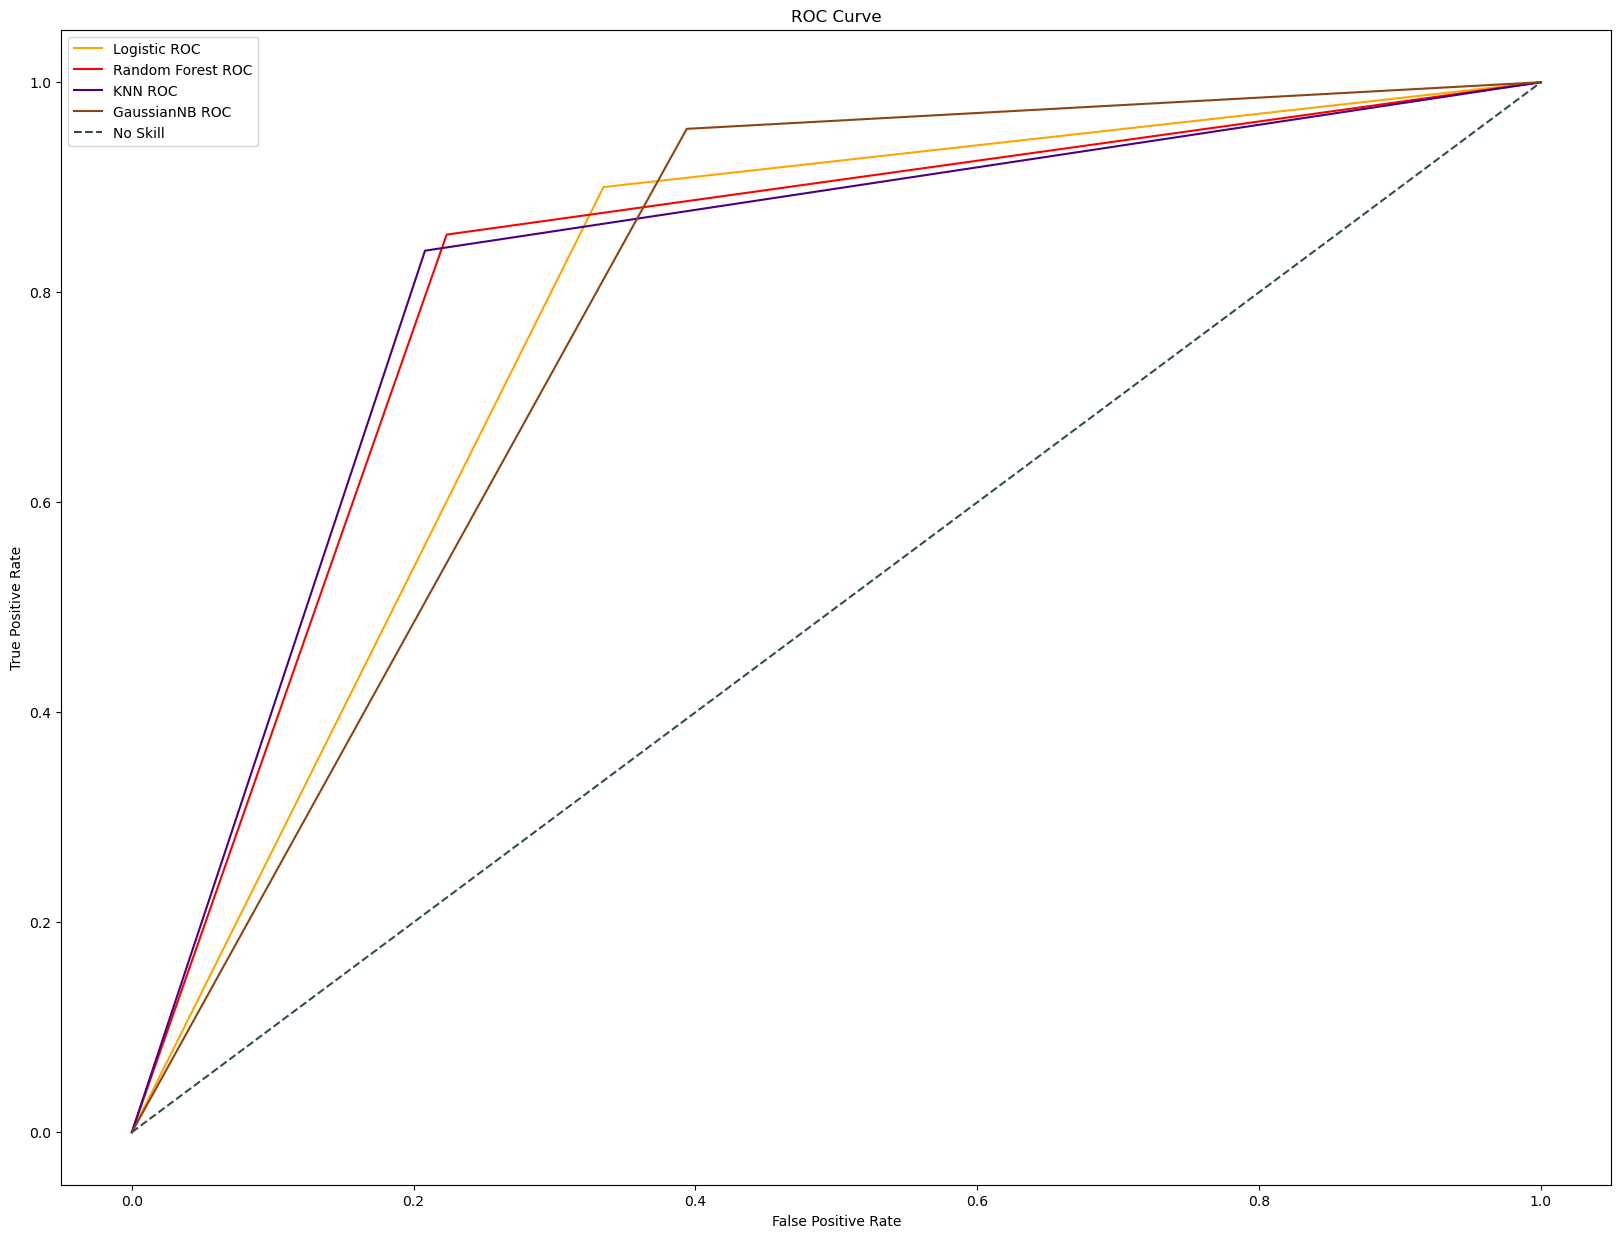

In [65]:
#Plot to show all the Roc Curve with Different Models
plt.figure(figsize=(20,15))
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot(fpr1, tpr1, color='red', label='Random Forest ROC')
plt.plot(fpr3, tpr3, color='indigo', label='KNN ROC')
plt.plot(fpr4, tpr4, color='saddlebrown', label='GaussianNB ROC')

plt.plot([0, 1], [0, 1], color='darkslategrey', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- So we can clearly see that Red line in the above graph cover maximum area and thus we can clearly say that Random Forest model is the best model for the prediction and also as the dataset was imbalanced and was made balance so we will use Roc Auc Score and Roc curve to state the prediction of our model.So in this dataset using Random Forest Classifier we are getting 81.56% roc auc score and also from the above graph it prove that the Random Forest Classifier Model is the Best Model.